Saving Crop_recommendation.csv to Crop_recommendation (10).csv
Accuracy: 0.9931818181818182

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon      

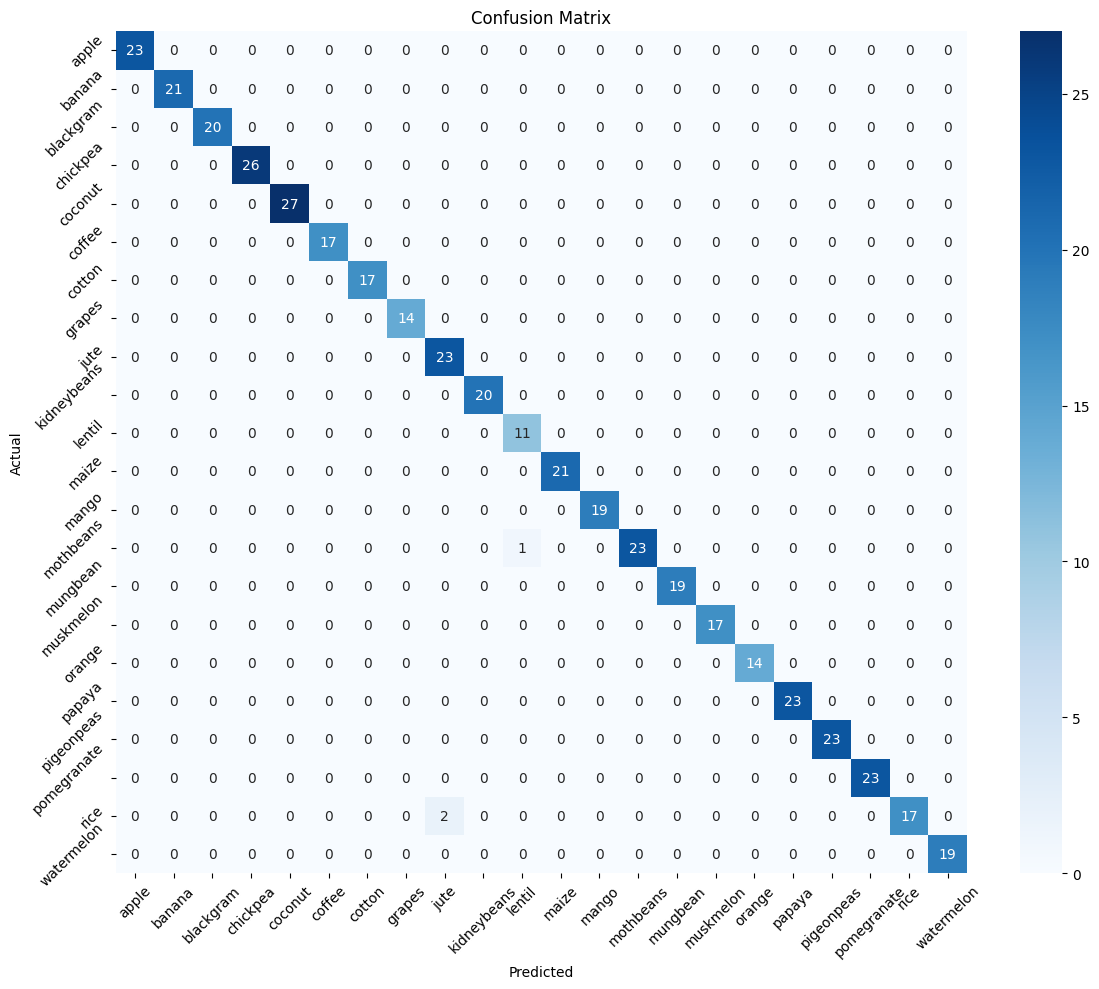

<ipython-input-12-bde9bb73175a>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette="coolwarm")


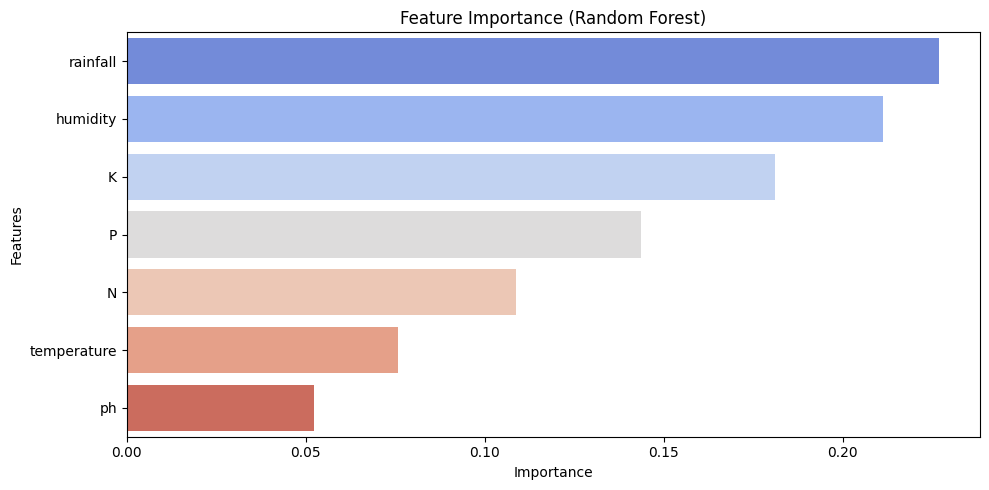

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Recommended Crop: rice

Model Accuracy on Test Set: 99.32%

Enter value for Nitrogen (N): 90
Enter value for Phosphorus (P): 45
Enter value for Potassium (K): 54
Enter value for Temperature (°C): 20.4
Enter value for Humidity (%): 45
Enter value for pH: 7
Enter value for Rainfall (mm): 202


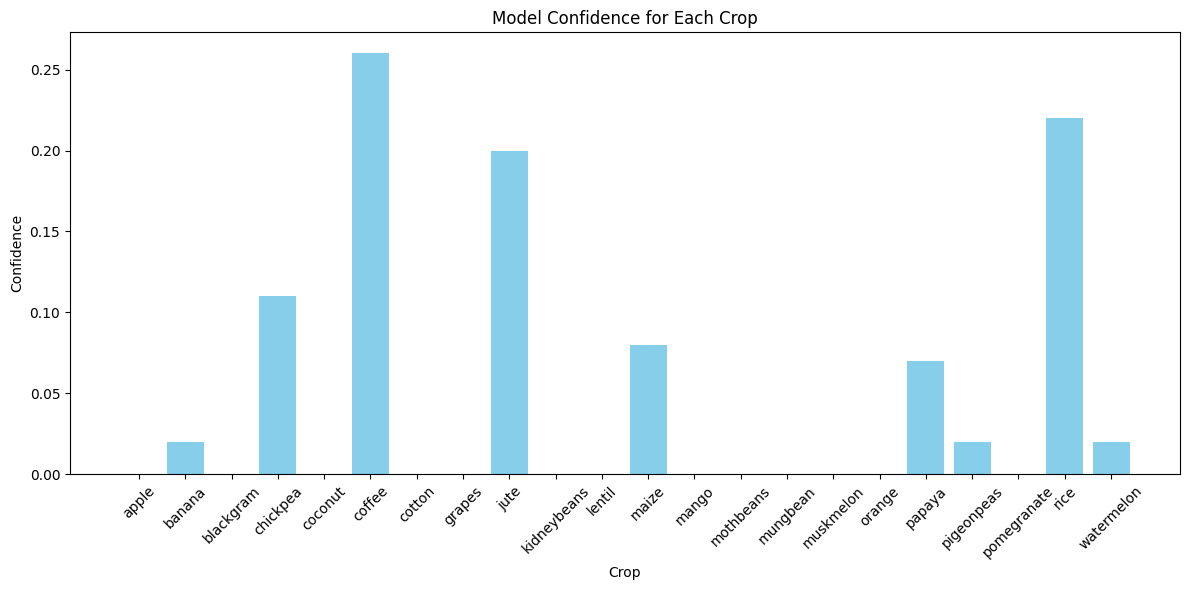

Recommended Crop: coffee (Confidence: 0.28)
You should grow this crop.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Crop_recommendation.csv")

# Features and labels
X = df.drop('label', axis=1)
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# Feature importance plot
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
sns.barplot(x=importances[indices], y=features[indices], palette="coolwarm")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Function to recommend crop (basic)
def recommend_crop(N, P, K, temperature, humidity, ph, rainfall):
    features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    return model.predict(features)[0]

# Example prediction
crop = recommend_crop(90, 42, 43, 20.8, 82.0, 6.5, 202.9)
print("Recommended Crop:", crop)

# Function with confidence output
def recommend_crop_confidence(N, P, K, temperature, humidity, ph, rainfall):
    input_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    probs = model.predict_proba(input_data)[0]
    top_index = np.argmax(probs)
    return model.classes_[top_index], probs[top_index], probs

# Print model accuracy before user input
print(f"\nModel Accuracy on Test Set: {accuracy:.2%}\n")

# User input for prediction
N = float(input("Enter value for Nitrogen (N): "))
P = float(input("Enter value for Phosphorus (P): "))
K = float(input("Enter value for Potassium (K): "))
temperature = float(input("Enter value for Temperature (°C): "))
humidity = float(input("Enter value for Humidity (%): "))
ph = float(input("Enter value for pH: "))
rainfall = float(input("Enter value for Rainfall (mm): "))


# Plot confidence distribution
plt.figure(figsize=(12, 6))
plt.bar(model.classes_, probs, color='skyblue')
plt.xlabel('Crop')
plt.ylabel('Confidence')
plt.title('Model Confidence for Each Crop')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

crop, confidence, probs = recommend_crop_confidence(N, P, K, temperature, humidity, ph, rainfall)
print(f"Recommended Crop: {crop} (Confidence: {confidence:.2f})")
print("You should grow this crop.")
